# Comparing Plate Metrics

In this notebook we evaluate the effect of different types of layouts when calculating quality assessment metrics as in [1].

We begin by importing required packages.

In [1]:
import seaborn as sns

# Our libraries
import libraries.disturbances as dt
import libraries.utilities as util
import libraries.screening as sc

## Data Generation

Here you can specify the details of the experiment.

We generated data based on [1], using layouts with 10 positive and 10 negative controls. 


In [2]:
## Simulation parameters
## Ensure that the appropriate PLAID layouts exist under layouts/screening_PLAID_layouts/ (or modify the location below)
neg_controls = 10
pos_controls = 10

id_text = "reviewing" #Used to personalise the output filenames.

max_error = 26 # Upper limit of the error levels that will be tested. 
             #The number is not included. 20 is already quite strong, depending on other values
             # such as the mean and stdev of the controls, plate size, etc

neg_control_mean=100 #Keep at 100 to simplify calculations relative to percentage of negative control.
pos_control_mean=5
neg_stdev=3
pos_stdev=4

batches = 10 #Number of times to generate new random plates

# Types of plate errors
# More plate errors can be added to this list. Other examples at the end of this notebook
error_types = [{'type':"bowl-nl", 'error_function':dt.add_bowlshaped_errors_nl}]


# Only PLAID layouts are needed in this experiment. 
# Other layouts will be selected from the plate randomly filled with 50% positive and 50% negative controls
plate_type = {'type':'PLAID','dir':'layouts/screening_PLAID_layouts/','regex':'plate_layout_'+str(neg_controls)+'-'+str(pos_controls)+'_(0*)(.+?).npy'}

data_directory = 'generated-data/quality-assessment-metrics/'
plots_directory = 'generated-plots/quality-assessment-metrics/'


Now we test all the metrics by calculating both the Z' factor and the SSMD on plates containing 50% negative controls and 50% positive controls, then sampling 10 positive controls and 10 negative controls according to PLAID (effective), random, and border layouts.

In [3]:
output_file_list = []

for i in range(0,max_error):
    error = i/100
    screening_scores_data_filename = sc.test_quality_assessment_metrics(plate_type,error_types,error,id_text,neg_controls,pos_controls,neg_control_mean,pos_control_mean,neg_stdev,pos_stdev,batches,data_directory)
    output_file_list.append(screening_scores_data_filename)

    print("\nThe generated data was stored in: "+screening_scores_data_filename)

Testing batch  0
Testing batch  1
Testing batch  2
Testing batch  3
Testing batch  4
Testing batch  5
Testing batch  6
Testing batch  7
Testing batch  8
Testing batch  9

The generated data was stored in: screening_metrics_data-10-10-0.0-20221110-reviewing.csv
Testing batch  0
Testing batch  1
Testing batch  2
Testing batch  3
Testing batch  4
Testing batch  5
Testing batch  6
Testing batch  7
Testing batch  8
Testing batch  9

The generated data was stored in: screening_metrics_data-10-10-0.01-20221110-reviewing.csv
Testing batch  0
Testing batch  1
Testing batch  2
Testing batch  3
Testing batch  4
Testing batch  5
Testing batch  6
Testing batch  7
Testing batch  8
Testing batch  9

The generated data was stored in: screening_metrics_data-10-10-0.02-20221110-reviewing.csv
Testing batch  0
Testing batch  1
Testing batch  2
Testing batch  3
Testing batch  4
Testing batch  5
Testing batch  6
Testing batch  7
Testing batch  8
Testing batch  9

The generated data was stored in: screening_

## Plotting the data

Now we can plot the data that was just generated. First we look at the Z' factor.

generated-data/quality-assessment-metrics/screening_metrics_data-10-10-0.0-20221110-reviewing.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:8.682e-01 t=-1.659e-01
Border vs. Random: t-test independent samples, P_val:7.080e-01 t=-3.747e-01
Border vs. Effective: t-test independent samples, P_val:5.906e-01 t=-5.381e-01


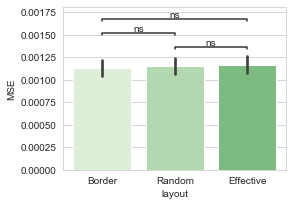

generated-data/quality-assessment-metrics/screening_metrics_data-10-10-0.01-20221110-reviewing.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:1.054e-01 t=1.620e+00
Border vs. Random: t-test independent samples, P_val:2.721e-33 t=1.221e+01
Border vs. Effective: t-test independent samples, P_val:3.626e-41 t=1.370e+01


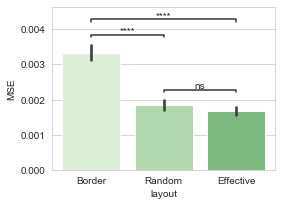

generated-data/quality-assessment-metrics/screening_metrics_data-10-10-0.02-20221110-reviewing.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:3.776e-07 t=5.094e+00
Border vs. Random: t-test independent samples, P_val:8.493e-107 t=2.310e+01
Border vs. Effective: t-test independent samples, P_val:2.439e-148 t=2.787e+01


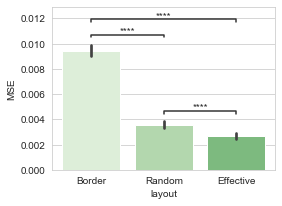

generated-data/quality-assessment-metrics/screening_metrics_data-10-10-0.03-20221110-reviewing.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:3.067e-18 t=8.779e+00
Border vs. Random: t-test independent samples, P_val:4.927e-139 t=2.685e+01
Border vs. Effective: t-test independent samples, P_val:1.526e-235 t=3.681e+01


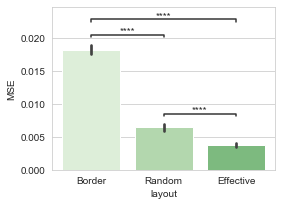

generated-data/quality-assessment-metrics/screening_metrics_data-10-10-0.04-20221110-reviewing.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:3.031e-11 t=6.676e+00
Border vs. Random: t-test independent samples, P_val:1.009e-205 t=3.386e+01
Border vs. Effective: t-test independent samples, P_val:8.110e-277 t=4.080e+01


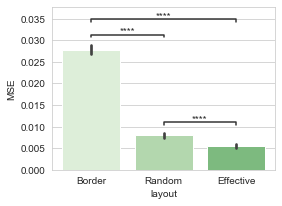

generated-data/quality-assessment-metrics/screening_metrics_data-10-10-0.05-20221110-reviewing.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:2.758e-13 t=7.347e+00
Border vs. Random: t-test independent samples, P_val:1.036e-204 t=3.376e+01
Border vs. Effective: t-test independent samples, P_val:8.068e-294 t=4.242e+01


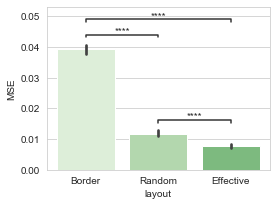

generated-data/quality-assessment-metrics/screening_metrics_data-10-10-0.06-20221110-reviewing.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:3.439e-16 t=8.215e+00
Border vs. Random: t-test independent samples, P_val:1.594e-214 t=3.474e+01
Border vs. Effective: t-test independent samples, P_val:1.846e-315 t=4.447e+01


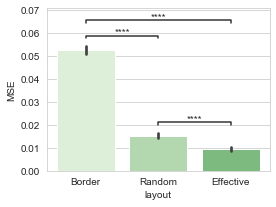

generated-data/quality-assessment-metrics/screening_metrics_data-10-10-0.07-20221110-reviewing.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:6.769e-17 t=8.413e+00
Border vs. Random: t-test independent samples, P_val:5.198e-207 t=3.399e+01
Border vs. Effective: t-test independent samples, P_val:0.000e+00 t=4.529e+01


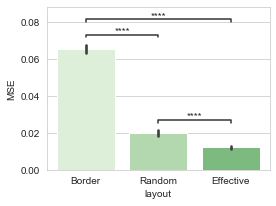

generated-data/quality-assessment-metrics/screening_metrics_data-10-10-0.08-20221110-reviewing.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:2.272e-12 t=7.054e+00
Border vs. Random: t-test independent samples, P_val:3.538e-242 t=3.746e+01
Border vs. Effective: t-test independent samples, P_val:0.000e+00 t=4.707e+01


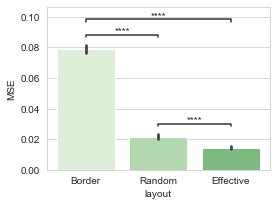

generated-data/quality-assessment-metrics/screening_metrics_data-10-10-0.09-20221110-reviewing.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:8.469e-21 t=9.441e+00
Border vs. Random: t-test independent samples, P_val:9.631e-228 t=3.605e+01
Border vs. Effective: t-test independent samples, P_val:0.000e+00 t=4.770e+01


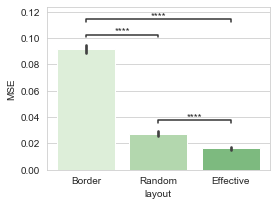

generated-data/quality-assessment-metrics/screening_metrics_data-10-10-0.1-20221110-reviewing.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:3.828e-20 t=9.275e+00
Border vs. Random: t-test independent samples, P_val:2.161e-231 t=3.640e+01
Border vs. Effective: t-test independent samples, P_val:0.000e+00 t=4.889e+01


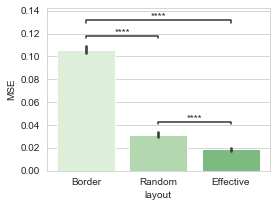

generated-data/quality-assessment-metrics/screening_metrics_data-10-10-0.11-20221110-reviewing.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:8.102e-20 t=9.192e+00
Border vs. Random: t-test independent samples, P_val:1.657e-191 t=3.242e+01
Border vs. Effective: t-test independent samples, P_val:6.474e-316 t=4.451e+01


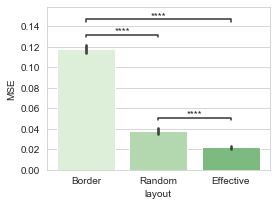

generated-data/quality-assessment-metrics/screening_metrics_data-10-10-0.12-20221110-reviewing.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:5.611e-20 t=9.233e+00
Border vs. Random: t-test independent samples, P_val:4.317e-200 t=3.329e+01
Border vs. Effective: t-test independent samples, P_val:2.174e-322 t=4.512e+01


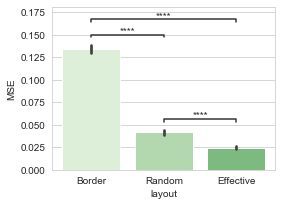

generated-data/quality-assessment-metrics/screening_metrics_data-10-10-0.13-20221110-reviewing.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:1.207e-18 t=8.887e+00
Border vs. Random: t-test independent samples, P_val:4.417e-205 t=3.379e+01
Border vs. Effective: t-test independent samples, P_val:0.000e+00 t=4.574e+01


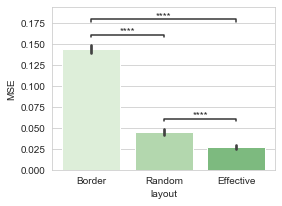

generated-data/quality-assessment-metrics/screening_metrics_data-10-10-0.14-20221110-reviewing.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:1.292e-24 t=1.036e+01
Border vs. Random: t-test independent samples, P_val:2.318e-181 t=3.138e+01
Border vs. Effective: t-test independent samples, P_val:1.142e-309 t=4.392e+01


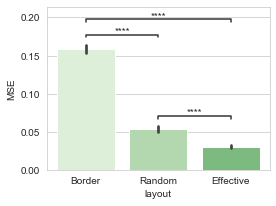

generated-data/quality-assessment-metrics/screening_metrics_data-10-10-0.15-20221110-reviewing.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:8.211e-19 t=8.931e+00
Border vs. Random: t-test independent samples, P_val:1.447e-202 t=3.354e+01
Border vs. Effective: t-test independent samples, P_val:1.716e-311 t=4.409e+01


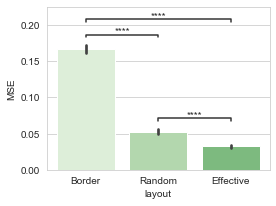

generated-data/quality-assessment-metrics/screening_metrics_data-10-10-0.16-20221110-reviewing.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:4.577e-16 t=8.179e+00
Border vs. Random: t-test independent samples, P_val:1.803e-199 t=3.323e+01
Border vs. Effective: t-test independent samples, P_val:9.247e-307 t=4.364e+01


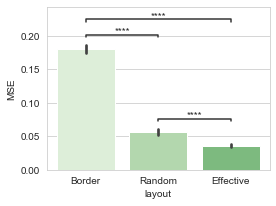

generated-data/quality-assessment-metrics/screening_metrics_data-10-10-0.17-20221110-reviewing.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:9.228e-21 t=9.431e+00
Border vs. Random: t-test independent samples, P_val:6.638e-182 t=3.143e+01
Border vs. Effective: t-test independent samples, P_val:1.274e-302 t=4.325e+01


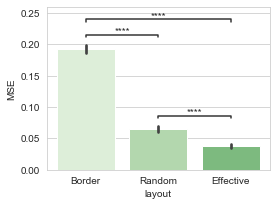

generated-data/quality-assessment-metrics/screening_metrics_data-10-10-0.18-20221110-reviewing.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:1.285e-19 t=9.141e+00
Border vs. Random: t-test independent samples, P_val:8.216e-184 t=3.163e+01
Border vs. Effective: t-test independent samples, P_val:1.107e-310 t=4.401e+01


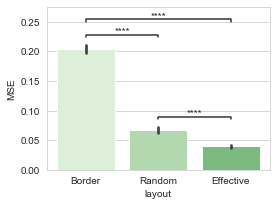

generated-data/quality-assessment-metrics/screening_metrics_data-10-10-0.19-20221110-reviewing.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:2.364e-19 t=9.072e+00
Border vs. Random: t-test independent samples, P_val:5.216e-175 t=3.072e+01
Border vs. Effective: t-test independent samples, P_val:1.291e-294 t=4.249e+01


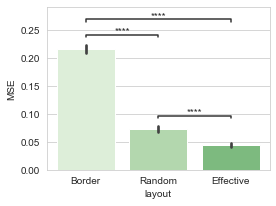

generated-data/quality-assessment-metrics/screening_metrics_data-10-10-0.2-20221110-reviewing.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:2.055e-22 t=9.837e+00
Border vs. Random: t-test independent samples, P_val:5.545e-170 t=3.019e+01
Border vs. Effective: t-test independent samples, P_val:9.796e-284 t=4.146e+01


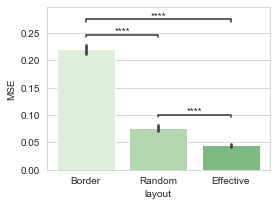

generated-data/quality-assessment-metrics/screening_metrics_data-10-10-0.21-20221110-reviewing.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:8.598e-20 t=9.186e+00
Border vs. Random: t-test independent samples, P_val:1.467e-173 t=3.057e+01
Border vs. Effective: t-test independent samples, P_val:4.404e-287 t=4.178e+01


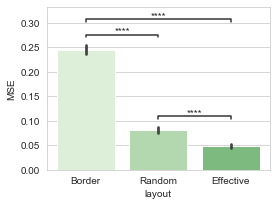

generated-data/quality-assessment-metrics/screening_metrics_data-10-10-0.22-20221110-reviewing.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:5.462e-27 t=1.089e+01
Border vs. Random: t-test independent samples, P_val:8.349e-165 t=2.964e+01
Border vs. Effective: t-test independent samples, P_val:2.440e-290 t=4.209e+01


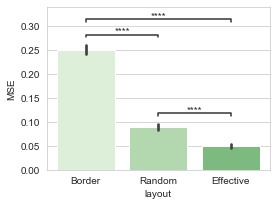

generated-data/quality-assessment-metrics/screening_metrics_data-10-10-0.23-20221110-reviewing.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:3.113e-19 t=9.041e+00
Border vs. Random: t-test independent samples, P_val:2.465e-166 t=2.981e+01
Border vs. Effective: t-test independent samples, P_val:1.202e-289 t=4.202e+01


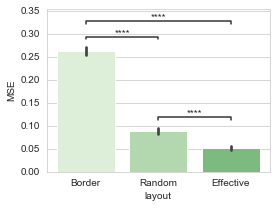

generated-data/quality-assessment-metrics/screening_metrics_data-10-10-0.24-20221110-reviewing.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:4.303e-20 t=9.262e+00
Border vs. Random: t-test independent samples, P_val:3.852e-167 t=2.989e+01
Border vs. Effective: t-test independent samples, P_val:2.199e-281 t=4.123e+01


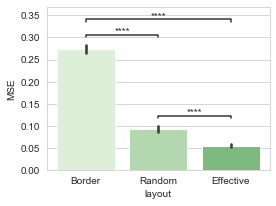

generated-data/quality-assessment-metrics/screening_metrics_data-10-10-0.25-20221110-reviewing.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:7.792e-22 t=9.697e+00
Border vs. Random: t-test independent samples, P_val:2.860e-154 t=2.852e+01
Border vs. Effective: t-test independent samples, P_val:2.923e-267 t=3.988e+01


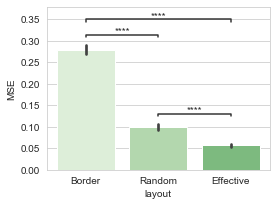

In [4]:
for screening_scores_data_filename in output_file_list:
    util.plotting_residual_metrics(data_directory+screening_scores_data_filename,metric='Zfactor', fig_name=screening_scores_data_filename, y_max = None, palette = None, plots_directory = plots_directory)


Now we look at the SSMD comparison 

generated-data/quality-assessment-metrics/screening_metrics_data-10-10-0.0-20221110-reviewing.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:4.713e-01 t=-7.205e-01
Border vs. Random: t-test independent samples, P_val:5.924e-01 t=-5.354e-01
Border vs. Effective: t-test independent samples, P_val:2.036e-01 t=-1.272e+00


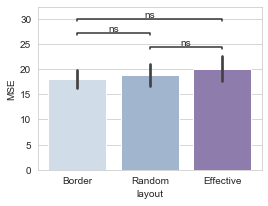

generated-data/quality-assessment-metrics/screening_metrics_data-10-10-0.01-20221110-reviewing.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:2.101e-01 t=1.254e+00
Border vs. Random: t-test independent samples, P_val:2.958e-27 t=1.095e+01
Border vs. Effective: t-test independent samples, P_val:3.415e-32 t=1.199e+01


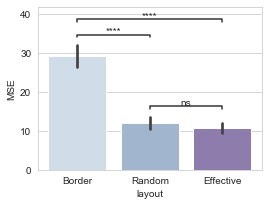

generated-data/quality-assessment-metrics/screening_metrics_data-10-10-0.02-20221110-reviewing.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:4.159e-06 t=4.614e+00
Border vs. Random: t-test independent samples, P_val:6.398e-85 t=2.033e+01
Border vs. Effective: t-test independent samples, P_val:3.943e-108 t=2.327e+01


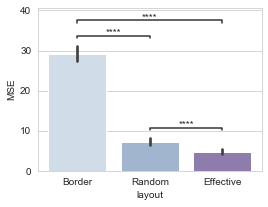

generated-data/quality-assessment-metrics/screening_metrics_data-10-10-0.03-20221110-reviewing.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:1.129e-12 t=7.152e+00
Border vs. Random: t-test independent samples, P_val:1.126e-86 t=2.056e+01
Border vs. Effective: t-test independent samples, P_val:1.950e-155 t=2.864e+01


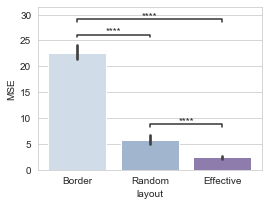

generated-data/quality-assessment-metrics/screening_metrics_data-10-10-0.04-20221110-reviewing.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:4.562e-11 t=6.615e+00
Border vs. Random: t-test independent samples, P_val:3.772e-139 t=2.686e+01
Border vs. Effective: t-test independent samples, P_val:2.569e-172 t=3.044e+01


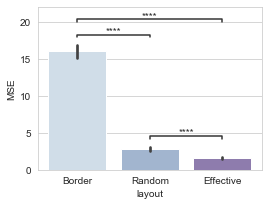

generated-data/quality-assessment-metrics/screening_metrics_data-10-10-0.05-20221110-reviewing.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:3.750e-10 t=6.290e+00
Border vs. Random: t-test independent samples, P_val:6.429e-144 t=2.739e+01
Border vs. Effective: t-test independent samples, P_val:4.326e-188 t=3.207e+01


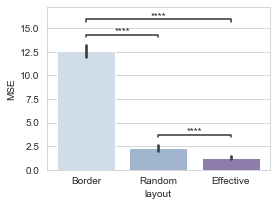

generated-data/quality-assessment-metrics/screening_metrics_data-10-10-0.06-20221110-reviewing.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:7.220e-11 t=6.546e+00
Border vs. Random: t-test independent samples, P_val:1.455e-109 t=2.344e+01
Border vs. Effective: t-test independent samples, P_val:9.319e-157 t=2.878e+01


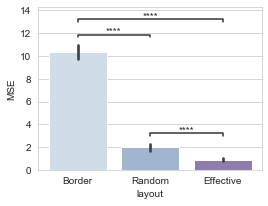

generated-data/quality-assessment-metrics/screening_metrics_data-10-10-0.07-20221110-reviewing.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:1.300e-12 t=7.132e+00
Border vs. Random: t-test independent samples, P_val:1.544e-129 t=2.578e+01
Border vs. Effective: t-test independent samples, P_val:3.860e-184 t=3.166e+01


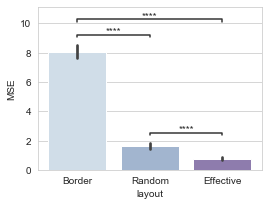

generated-data/quality-assessment-metrics/screening_metrics_data-10-10-0.08-20221110-reviewing.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:1.348e-10 t=6.450e+00
Border vs. Random: t-test independent samples, P_val:1.997e-135 t=2.644e+01
Border vs. Effective: t-test independent samples, P_val:8.023e-197 t=3.296e+01


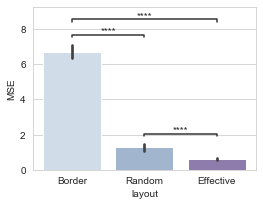

generated-data/quality-assessment-metrics/screening_metrics_data-10-10-0.09-20221110-reviewing.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:1.052e-15 t=8.076e+00
Border vs. Random: t-test independent samples, P_val:2.664e-146 t=2.765e+01
Border vs. Effective: t-test independent samples, P_val:1.212e-205 t=3.385e+01


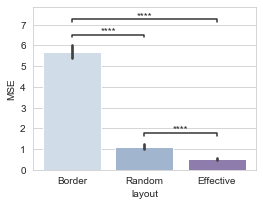

generated-data/quality-assessment-metrics/screening_metrics_data-10-10-0.1-20221110-reviewing.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:2.986e-14 t=7.646e+00
Border vs. Random: t-test independent samples, P_val:2.490e-133 t=2.621e+01
Border vs. Effective: t-test independent samples, P_val:3.876e-201 t=3.340e+01


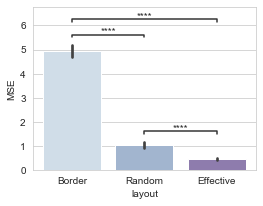

generated-data/quality-assessment-metrics/screening_metrics_data-10-10-0.11-20221110-reviewing.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:4.730e-12 t=6.949e+00
Border vs. Random: t-test independent samples, P_val:1.203e-92 t=2.134e+01
Border vs. Effective: t-test independent samples, P_val:6.822e-178 t=3.102e+01


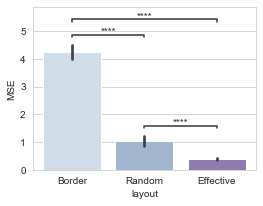

generated-data/quality-assessment-metrics/screening_metrics_data-10-10-0.12-20221110-reviewing.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:2.877e-09 t=5.961e+00
Border vs. Random: t-test independent samples, P_val:4.852e-96 t=2.177e+01
Border vs. Effective: t-test independent samples, P_val:3.695e-169 t=3.010e+01


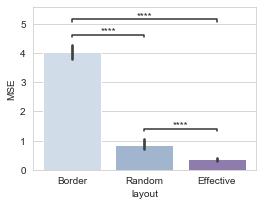

generated-data/quality-assessment-metrics/screening_metrics_data-10-10-0.13-20221110-reviewing.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:7.426e-14 t=7.525e+00
Border vs. Random: t-test independent samples, P_val:4.845e-125 t=2.526e+01
Border vs. Effective: t-test independent samples, P_val:4.791e-186 t=3.186e+01


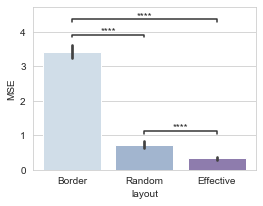

generated-data/quality-assessment-metrics/screening_metrics_data-10-10-0.14-20221110-reviewing.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:4.683e-17 t=8.457e+00
Border vs. Random: t-test independent samples, P_val:3.528e-115 t=2.411e+01
Border vs. Effective: t-test independent samples, P_val:6.940e-170 t=3.018e+01


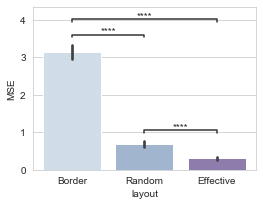

generated-data/quality-assessment-metrics/screening_metrics_data-10-10-0.15-20221110-reviewing.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:1.232e-14 t=7.762e+00
Border vs. Random: t-test independent samples, P_val:5.181e-127 t=2.549e+01
Border vs. Effective: t-test independent samples, P_val:1.373e-182 t=3.150e+01


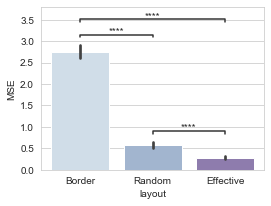

generated-data/quality-assessment-metrics/screening_metrics_data-10-10-0.16-20221110-reviewing.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:3.705e-12 t=6.984e+00
Border vs. Random: t-test independent samples, P_val:2.584e-127 t=2.552e+01
Border vs. Effective: t-test independent samples, P_val:3.018e-175 t=3.074e+01


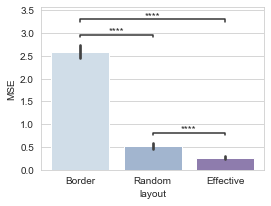

generated-data/quality-assessment-metrics/screening_metrics_data-10-10-0.17-20221110-reviewing.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:1.511e-16 t=8.316e+00
Border vs. Random: t-test independent samples, P_val:1.702e-108 t=2.331e+01
Border vs. Effective: t-test independent samples, P_val:1.547e-164 t=2.962e+01


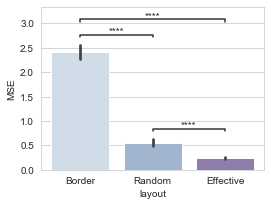

generated-data/quality-assessment-metrics/screening_metrics_data-10-10-0.18-20221110-reviewing.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:1.729e-14 t=7.717e+00
Border vs. Random: t-test independent samples, P_val:2.454e-102 t=2.256e+01
Border vs. Effective: t-test independent samples, P_val:6.155e-169 t=3.008e+01


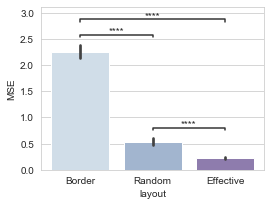

generated-data/quality-assessment-metrics/screening_metrics_data-10-10-0.19-20221110-reviewing.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:4.643e-14 t=7.587e+00
Border vs. Random: t-test independent samples, P_val:3.587e-102 t=2.254e+01
Border vs. Effective: t-test independent samples, P_val:1.647e-168 t=3.004e+01


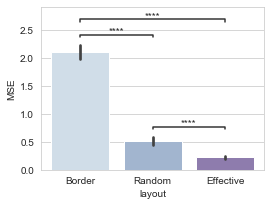

generated-data/quality-assessment-metrics/screening_metrics_data-10-10-0.2-20221110-reviewing.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:4.346e-16 t=8.186e+00
Border vs. Random: t-test independent samples, P_val:7.339e-121 t=2.478e+01
Border vs. Effective: t-test independent samples, P_val:1.526e-173 t=3.056e+01


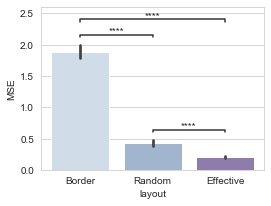

generated-data/quality-assessment-metrics/screening_metrics_data-10-10-0.21-20221110-reviewing.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:7.794e-15 t=7.821e+00
Border vs. Random: t-test independent samples, P_val:3.024e-101 t=2.242e+01
Border vs. Effective: t-test independent samples, P_val:2.288e-158 t=2.896e+01


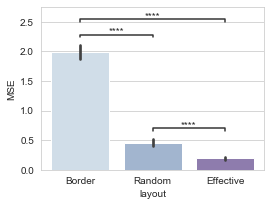

generated-data/quality-assessment-metrics/screening_metrics_data-10-10-0.22-20221110-reviewing.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:5.002e-20 t=9.246e+00
Border vs. Random: t-test independent samples, P_val:5.525e-92 t=2.125e+01
Border vs. Effective: t-test independent samples, P_val:8.093e-144 t=2.738e+01


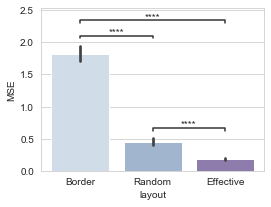

generated-data/quality-assessment-metrics/screening_metrics_data-10-10-0.23-20221110-reviewing.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:2.114e-14 t=7.691e+00
Border vs. Random: t-test independent samples, P_val:8.497e-98 t=2.199e+01
Border vs. Effective: t-test independent samples, P_val:2.062e-166 t=2.981e+01


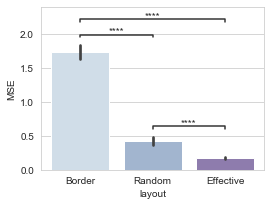

generated-data/quality-assessment-metrics/screening_metrics_data-10-10-0.24-20221110-reviewing.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:6.520e-13 t=7.229e+00
Border vs. Random: t-test independent samples, P_val:2.276e-105 t=2.293e+01
Border vs. Effective: t-test independent samples, P_val:2.244e-154 t=2.853e+01


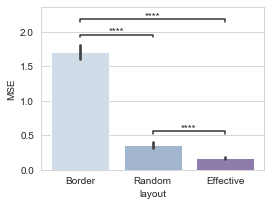

generated-data/quality-assessment-metrics/screening_metrics_data-10-10-0.25-20221110-reviewing.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:9.044e-18 t=8.653e+00
Border vs. Random: t-test independent samples, P_val:1.487e-97 t=2.196e+01
Border vs. Effective: t-test independent samples, P_val:3.017e-141 t=2.709e+01


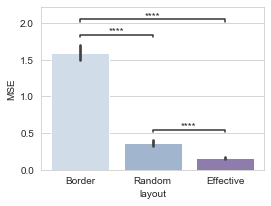

In [5]:
for screening_scores_data_filename in output_file_list:
    util.plotting_residual_metrics(data_directory+screening_scores_data_filename,metric='SSMD', fig_name=screening_scores_data_filename, y_max = None, palette = sns.color_palette("BuPu",4), plots_directory = plots_directory)


## Plots in the manuscript

generated-data/quality-assessment-metrics/screening_scores_data-10-10-0.06--20221106-stdev-3-4.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:8.112e-09 t=5.829e+00
Border vs. Random: t-test independent samples, P_val:2.576e-70 t=1.963e+01
Border vs. Effective: t-test independent samples, P_val:9.300e-123 t=2.833e+01


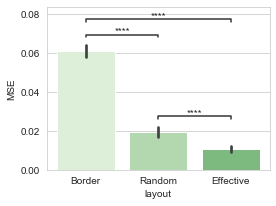

generated-data/quality-assessment-metrics/screening_scores_data-10-10-0.06--20221106-stdev-3-4.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:9.940e-07 t=4.931e+00
Border vs. Random: t-test independent samples, P_val:1.426e-41 t=1.432e+01
Border vs. Effective: t-test independent samples, P_val:2.506e-70 t=1.963e+01


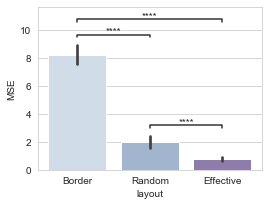

In [6]:
screening_scores_data_filename = 'screening_scores_data-10-10-0.06--20221106-stdev-3-4.csv'

util.plotting_residual_metrics(data_directory+screening_scores_data_filename,metric='Zfactor', fig_name='manuscript', y_max = None, plots_directory = plots_directory)
util.plotting_residual_metrics(data_directory+screening_scores_data_filename,metric='SSMD', fig_name='manuscript', y_max = None, palette = sns.color_palette("BuPu",4), plots_directory = plots_directory)



## Plotting the supplement data

First we plot the Z' factor MSE. Note that we fixed the y_max parameter so that all plots have the same y axis in a suitable way for the supplement.

generated-data/quality-assessment-metrics/screening_scores_data-10-10-0.0--20221106-stdev-3-4.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:8.653e-01 t=-1.697e-01
Border vs. Random: t-test independent samples, P_val:9.067e-01 t=1.172e-01
Border vs. Effective: t-test independent samples, P_val:9.552e-01 t=-5.614e-02


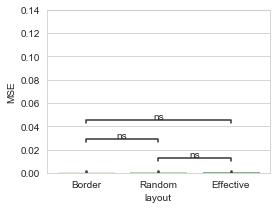

generated-data/quality-assessment-metrics/screening_scores_data-10-10-0.01--20221106-stdev-3-4.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:7.586e-02 t=1.778e+00
Border vs. Random: t-test independent samples, P_val:2.257e-11 t=6.785e+00
Border vs. Effective: t-test independent samples, P_val:9.607e-18 t=8.783e+00


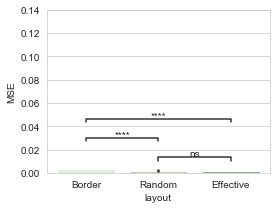

generated-data/quality-assessment-metrics/screening_scores_data-10-10-0.02--20221106-stdev-3-4.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:6.602e-04 t=3.419e+00
Border vs. Random: t-test independent samples, P_val:7.707e-36 t=1.314e+01
Border vs. Effective: t-test independent samples, P_val:1.495e-50 t=1.607e+01


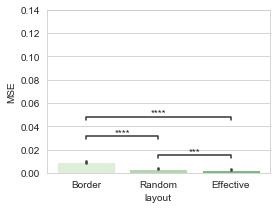

generated-data/quality-assessment-metrics/screening_scores_data-10-10-0.03--20221106-stdev-3-4.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:5.911e-05 t=4.038e+00
Border vs. Random: t-test independent samples, P_val:4.759e-60 t=1.782e+01
Border vs. Effective: t-test independent samples, P_val:8.842e-83 t=2.176e+01


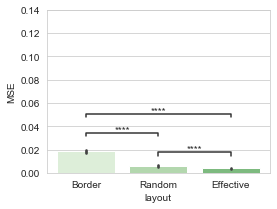

generated-data/quality-assessment-metrics/screening_scores_data-10-10-0.04--20221106-stdev-3-4.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:1.714e-05 t=4.326e+00
Border vs. Random: t-test independent samples, P_val:3.794e-72 t=1.995e+01
Border vs. Effective: t-test independent samples, P_val:1.919e-97 t=2.420e+01


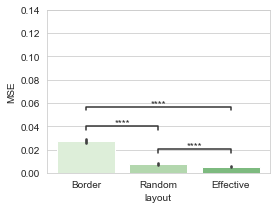

generated-data/quality-assessment-metrics/screening_scores_data-10-10-0.05--20221106-stdev-3-4.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:5.621e-06 t=4.571e+00
Border vs. Random: t-test independent samples, P_val:2.204e-64 t=1.859e+01
Border vs. Effective: t-test independent samples, P_val:1.739e-100 t=2.470e+01


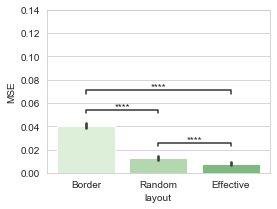

generated-data/quality-assessment-metrics/screening_scores_data-10-10-0.06--20221106-stdev-3-4.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:8.112e-09 t=5.829e+00
Border vs. Random: t-test independent samples, P_val:2.576e-70 t=1.963e+01
Border vs. Effective: t-test independent samples, P_val:9.300e-123 t=2.833e+01


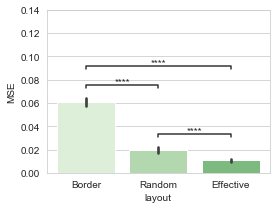

generated-data/quality-assessment-metrics/screening_scores_data-10-10-0.07--20221106-stdev-3-4.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:2.298e-07 t=5.219e+00
Border vs. Random: t-test independent samples, P_val:1.801e-74 t=2.035e+01
Border vs. Effective: t-test independent samples, P_val:4.361e-114 t=2.692e+01


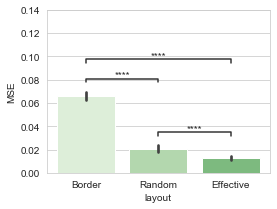

generated-data/quality-assessment-metrics/screening_scores_data-10-10-0.08--20221106-stdev-3-4.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:1.801e-06 t=4.810e+00
Border vs. Random: t-test independent samples, P_val:2.480e-66 t=1.894e+01
Border vs. Effective: t-test independent samples, P_val:6.140e-104 t=2.526e+01


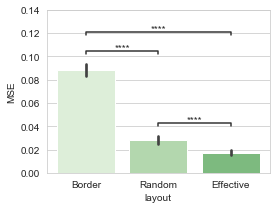

generated-data/quality-assessment-metrics/screening_scores_data-10-10-0.09--20221106-stdev-3-4.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:1.449e-08 t=5.727e+00
Border vs. Random: t-test independent samples, P_val:1.233e-60 t=1.792e+01
Border vs. Effective: t-test independent samples, P_val:5.269e-115 t=2.707e+01


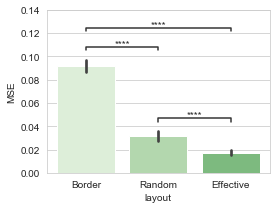

generated-data/quality-assessment-metrics/screening_scores_data-10-10-0.1--20221106-stdev-3-4.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:6.758e-07 t=5.008e+00
Border vs. Random: t-test independent samples, P_val:4.312e-63 t=1.836e+01
Border vs. Effective: t-test independent samples, P_val:5.006e-104 t=2.528e+01


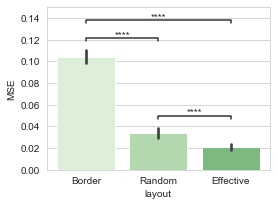

generated-data/quality-assessment-metrics/screening_scores_data-10-10-0.11--20221106-stdev-3-4.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:9.048e-10 t=6.200e+00
Border vs. Random: t-test independent samples, P_val:2.594e-58 t=1.751e+01
Border vs. Effective: t-test independent samples, P_val:1.722e-107 t=2.585e+01


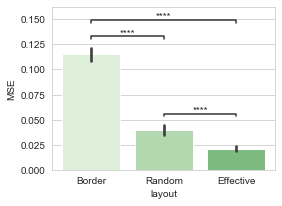

generated-data/quality-assessment-metrics/screening_scores_data-10-10-0.12--20221106-stdev-3-4.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:6.279e-10 t=6.260e+00
Border vs. Random: t-test independent samples, P_val:7.741e-57 t=1.724e+01
Border vs. Effective: t-test independent samples, P_val:3.993e-109 t=2.611e+01


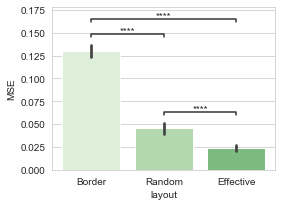

generated-data/quality-assessment-metrics/screening_scores_data-10-10-0.13--20221106-stdev-3-4.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:6.967e-06 t=4.525e+00
Border vs. Random: t-test independent samples, P_val:9.973e-76 t=2.056e+01
Border vs. Effective: t-test independent samples, P_val:2.384e-111 t=2.648e+01


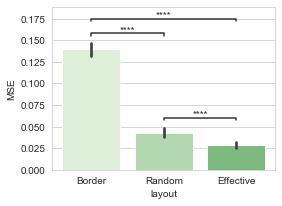

generated-data/quality-assessment-metrics/screening_scores_data-10-10-0.14--20221106-stdev-3-4.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:8.554e-08 t=5.405e+00
Border vs. Random: t-test independent samples, P_val:3.035e-73 t=2.014e+01
Border vs. Effective: t-test independent samples, P_val:1.177e-106 t=2.571e+01


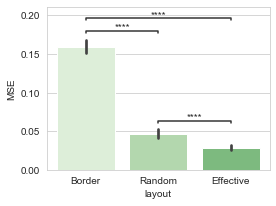

generated-data/quality-assessment-metrics/screening_scores_data-10-10-0.15--20221106-stdev-3-4.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:8.630e-06 t=4.478e+00
Border vs. Random: t-test independent samples, P_val:1.238e-74 t=2.038e+01
Border vs. Effective: t-test independent samples, P_val:1.666e-107 t=2.585e+01


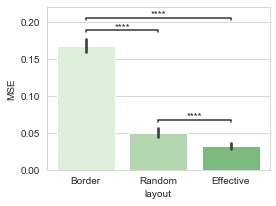

generated-data/quality-assessment-metrics/screening_scores_data-10-10-0.16--20221106-stdev-3-4.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:1.294e-04 t=3.847e+00
Border vs. Random: t-test independent samples, P_val:5.944e-68 t=1.922e+01
Border vs. Effective: t-test independent samples, P_val:1.578e-101 t=2.487e+01


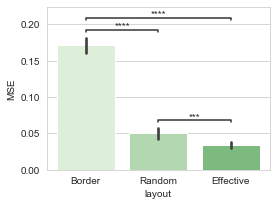

generated-data/quality-assessment-metrics/screening_scores_data-10-10-0.17--20221106-stdev-3-4.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:3.004e-08 t=5.597e+00
Border vs. Random: t-test independent samples, P_val:2.647e-57 t=1.732e+01
Border vs. Effective: t-test independent samples, P_val:2.155e-103 t=2.517e+01


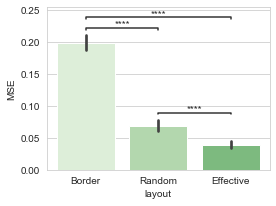

generated-data/quality-assessment-metrics/screening_scores_data-10-10-0.18--20221106-stdev-3-4.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:1.140e-06 t=4.904e+00
Border vs. Random: t-test independent samples, P_val:1.681e-68 t=1.932e+01
Border vs. Effective: t-test independent samples, P_val:4.513e-108 t=2.594e+01


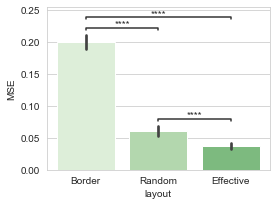

generated-data/quality-assessment-metrics/screening_scores_data-10-10-0.19--20221106-stdev-3-4.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:1.265e-03 t=3.235e+00
Border vs. Random: t-test independent samples, P_val:2.579e-76 t=2.066e+01
Border vs. Effective: t-test independent samples, P_val:5.995e-101 t=2.477e+01


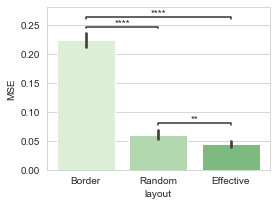

generated-data/quality-assessment-metrics/screening_scores_data-10-10-0.2--20221106-stdev-3-4.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:3.243e-04 t=3.611e+00
Border vs. Random: t-test independent samples, P_val:3.477e-71 t=1.978e+01
Border vs. Effective: t-test independent samples, P_val:1.818e-97 t=2.420e+01


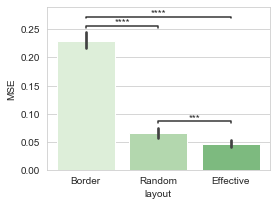

generated-data/quality-assessment-metrics/screening_scores_data-10-10-0.21--20221106-stdev-3-4.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:8.533e-06 t=4.481e+00
Border vs. Random: t-test independent samples, P_val:5.995e-54 t=1.671e+01
Border vs. Effective: t-test independent samples, P_val:1.225e-94 t=2.373e+01


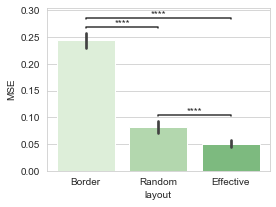

generated-data/quality-assessment-metrics/screening_scores_data-10-10-0.22--20221106-stdev-3-4.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:1.303e-07 t=5.327e+00
Border vs. Random: t-test independent samples, P_val:4.133e-60 t=1.783e+01
Border vs. Effective: t-test independent samples, P_val:1.043e-97 t=2.424e+01


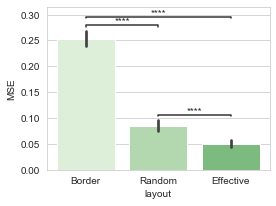

generated-data/quality-assessment-metrics/screening_scores_data-10-10-0.23--20221106-stdev-3-4.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:2.386e-08 t=5.638e+00
Border vs. Random: t-test independent samples, P_val:2.395e-55 t=1.696e+01
Border vs. Effective: t-test independent samples, P_val:2.879e-101 t=2.483e+01


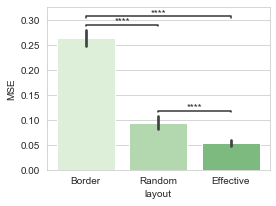

generated-data/quality-assessment-metrics/screening_scores_data-10-10-0.24--20221106-stdev-3-4.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:3.206e-10 t=6.369e+00
Border vs. Random: t-test independent samples, P_val:1.488e-53 t=1.663e+01
Border vs. Effective: t-test independent samples, P_val:7.693e-98 t=2.426e+01


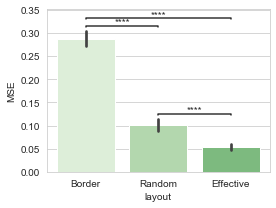

generated-data/quality-assessment-metrics/screening_scores_data-10-10-0.25--20221106-stdev-3-4.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:4.139e-05 t=4.123e+00
Border vs. Random: t-test independent samples, P_val:1.277e-64 t=1.863e+01
Border vs. Effective: t-test independent samples, P_val:8.850e-101 t=2.475e+01


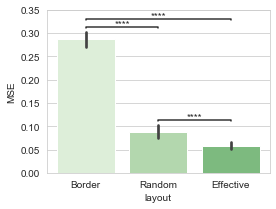

In [7]:
for error in range(0,26):
    screening_scores_data_filename = 'screening_scores_data-10-10-'+str(error/100)+'--20221106-stdev-3-4.csv'
    util.plotting_residual_metrics(data_directory+screening_scores_data_filename,metric='Zfactor', fig_name=screening_scores_data_filename, y_max = 0.14, plots_directory = plots_directory)


Finally, we look at the SSMD MSE. Note that we fixed the y_max parameter so that all plots have the same y axis in a suitable way for the supplement.

generated-data/quality-assessment-metrics/screening_scores_data-10-10-0.0--20221106-stdev-3-4.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:8.909e-01 t=1.373e-01
Border vs. Random: t-test independent samples, P_val:9.474e-01 t=6.599e-02
Border vs. Effective: t-test independent samples, P_val:8.342e-01 t=2.094e-01


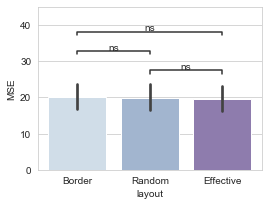

generated-data/quality-assessment-metrics/screening_scores_data-10-10-0.01--20221106-stdev-3-4.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:1.076e-01 t=1.611e+00
Border vs. Random: t-test independent samples, P_val:2.563e-09 t=6.026e+00
Border vs. Effective: t-test independent samples, P_val:2.606e-16 t=8.368e+00


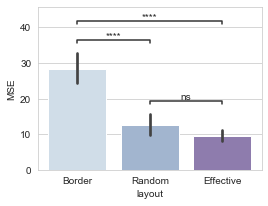

generated-data/quality-assessment-metrics/screening_scores_data-10-10-0.02--20221106-stdev-3-4.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:2.149e-02 t=2.304e+00
Border vs. Random: t-test independent samples, P_val:4.001e-28 t=1.143e+01
Border vs. Effective: t-test independent samples, P_val:1.485e-34 t=1.286e+01


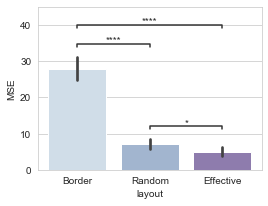

generated-data/quality-assessment-metrics/screening_scores_data-10-10-0.03--20221106-stdev-3-4.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:6.343e-05 t=4.021e+00
Border vs. Random: t-test independent samples, P_val:2.375e-37 t=1.346e+01
Border vs. Effective: t-test independent samples, P_val:4.738e-45 t=1.501e+01


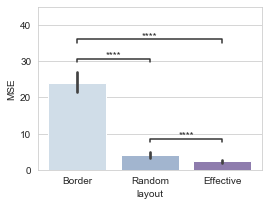

generated-data/quality-assessment-metrics/screening_scores_data-10-10-0.04--20221106-stdev-3-4.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:4.480e-06 t=4.620e+00
Border vs. Random: t-test independent samples, P_val:2.281e-52 t=1.641e+01
Border vs. Effective: t-test independent samples, P_val:1.220e-64 t=1.864e+01


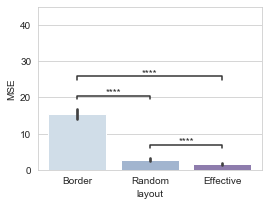

generated-data/quality-assessment-metrics/screening_scores_data-10-10-0.05--20221106-stdev-3-4.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:5.358e-04 t=3.476e+00
Border vs. Random: t-test independent samples, P_val:2.887e-34 t=1.280e+01
Border vs. Effective: t-test independent samples, P_val:2.067e-60 t=1.788e+01


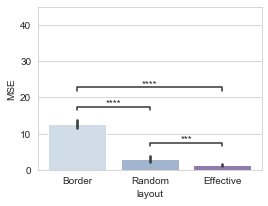

generated-data/quality-assessment-metrics/screening_scores_data-10-10-0.06--20221106-stdev-3-4.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:9.940e-07 t=4.931e+00
Border vs. Random: t-test independent samples, P_val:1.426e-41 t=1.432e+01
Border vs. Effective: t-test independent samples, P_val:2.506e-70 t=1.963e+01


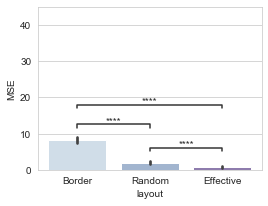

generated-data/quality-assessment-metrics/screening_scores_data-10-10-0.07--20221106-stdev-3-4.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:1.234e-05 t=4.399e+00
Border vs. Random: t-test independent samples, P_val:1.255e-39 t=1.393e+01
Border vs. Effective: t-test independent samples, P_val:1.331e-60 t=1.792e+01


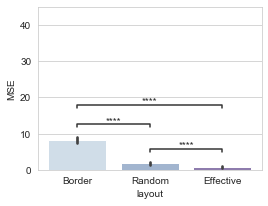

generated-data/quality-assessment-metrics/screening_scores_data-10-10-0.08--20221106-stdev-3-4.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:1.241e-03 t=3.241e+00
Border vs. Random: t-test independent samples, P_val:7.909e-39 t=1.376e+01
Border vs. Effective: t-test independent samples, P_val:2.698e-61 t=1.804e+01


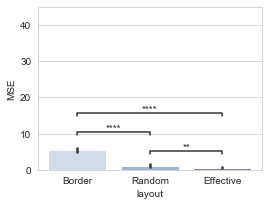

generated-data/quality-assessment-metrics/screening_scores_data-10-10-0.09--20221106-stdev-3-4.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:5.136e-06 t=4.590e+00
Border vs. Random: t-test independent samples, P_val:2.336e-35 t=1.304e+01
Border vs. Effective: t-test independent samples, P_val:5.561e-74 t=2.026e+01


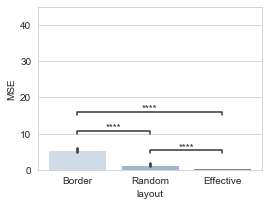

generated-data/quality-assessment-metrics/screening_scores_data-10-10-0.1--20221106-stdev-3-4.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:2.709e-06 t=4.726e+00
Border vs. Random: t-test independent samples, P_val:1.487e-29 t=1.176e+01
Border vs. Effective: t-test independent samples, P_val:2.298e-52 t=1.641e+01


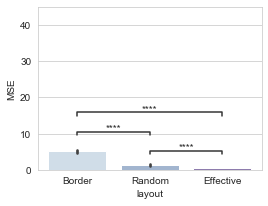

generated-data/quality-assessment-metrics/screening_scores_data-10-10-0.11--20221106-stdev-3-4.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:2.521e-08 t=5.628e+00
Border vs. Random: t-test independent samples, P_val:7.470e-37 t=1.335e+01
Border vs. Effective: t-test independent samples, P_val:1.518e-60 t=1.791e+01


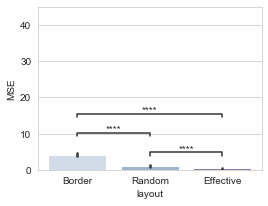

generated-data/quality-assessment-metrics/screening_scores_data-10-10-0.12--20221106-stdev-3-4.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:3.749e-07 t=5.124e+00
Border vs. Random: t-test independent samples, P_val:8.826e-33 t=1.248e+01
Border vs. Effective: t-test independent samples, P_val:2.862e-59 t=1.768e+01


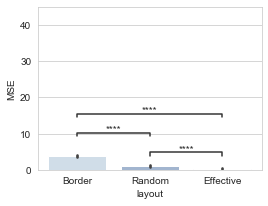

generated-data/quality-assessment-metrics/screening_scores_data-10-10-0.13--20221106-stdev-3-4.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:8.327e-05 t=3.955e+00
Border vs. Random: t-test independent samples, P_val:8.444e-44 t=1.477e+01
Border vs. Effective: t-test independent samples, P_val:1.524e-61 t=1.809e+01


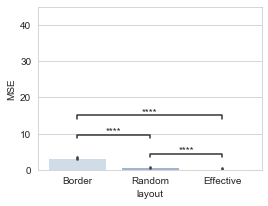

generated-data/quality-assessment-metrics/screening_scores_data-10-10-0.14--20221106-stdev-3-4.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:3.075e-06 t=4.699e+00
Border vs. Random: t-test independent samples, P_val:2.211e-43 t=1.468e+01
Border vs. Effective: t-test independent samples, P_val:1.096e-53 t=1.666e+01


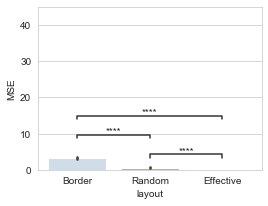

generated-data/quality-assessment-metrics/screening_scores_data-10-10-0.15--20221106-stdev-3-4.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:1.672e-04 t=3.782e+00
Border vs. Random: t-test independent samples, P_val:1.418e-55 t=1.701e+01
Border vs. Effective: t-test independent samples, P_val:4.114e-68 t=1.925e+01


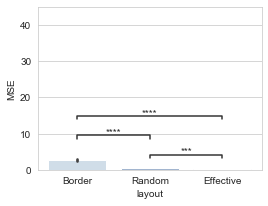

generated-data/quality-assessment-metrics/screening_scores_data-10-10-0.16--20221106-stdev-3-4.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:7.017e-05 t=3.997e+00
Border vs. Random: t-test independent samples, P_val:5.499e-35 t=1.296e+01
Border vs. Effective: t-test independent samples, P_val:7.231e-52 t=1.632e+01


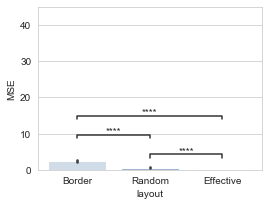

generated-data/quality-assessment-metrics/screening_scores_data-10-10-0.17--20221106-stdev-3-4.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:3.159e-06 t=4.694e+00
Border vs. Random: t-test independent samples, P_val:2.447e-29 t=1.171e+01
Border vs. Effective: t-test independent samples, P_val:1.340e-61 t=1.810e+01


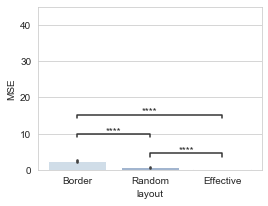

generated-data/quality-assessment-metrics/screening_scores_data-10-10-0.18--20221106-stdev-3-4.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:1.096e-04 t=3.888e+00
Border vs. Random: t-test independent samples, P_val:1.163e-45 t=1.513e+01
Border vs. Effective: t-test independent samples, P_val:2.621e-64 t=1.858e+01


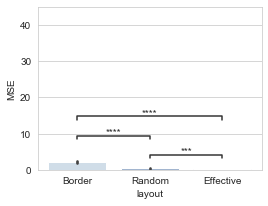

generated-data/quality-assessment-metrics/screening_scores_data-10-10-0.19--20221106-stdev-3-4.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:8.946e-04 t=3.334e+00
Border vs. Random: t-test independent samples, P_val:7.066e-44 t=1.478e+01
Border vs. Effective: t-test independent samples, P_val:7.333e-57 t=1.724e+01


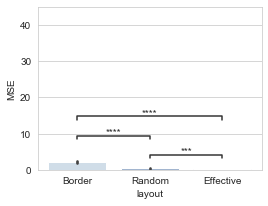

generated-data/quality-assessment-metrics/screening_scores_data-10-10-0.2--20221106-stdev-3-4.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:1.209e-04 t=3.863e+00
Border vs. Random: t-test independent samples, P_val:2.201e-45 t=1.508e+01
Border vs. Effective: t-test independent samples, P_val:3.685e-56 t=1.711e+01


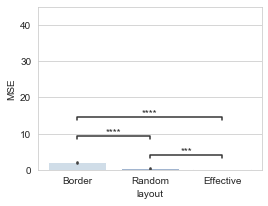

generated-data/quality-assessment-metrics/screening_scores_data-10-10-0.21--20221106-stdev-3-4.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:6.249e-04 t=3.434e+00
Border vs. Random: t-test independent samples, P_val:1.769e-23 t=1.031e+01
Border vs. Effective: t-test independent samples, P_val:1.472e-47 t=1.550e+01


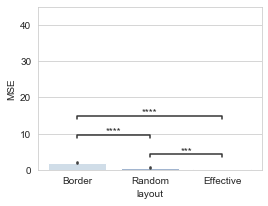

generated-data/quality-assessment-metrics/screening_scores_data-10-10-0.22--20221106-stdev-3-4.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:9.813e-05 t=3.915e+00
Border vs. Random: t-test independent samples, P_val:5.838e-34 t=1.274e+01
Border vs. Effective: t-test independent samples, P_val:1.673e-47 t=1.549e+01


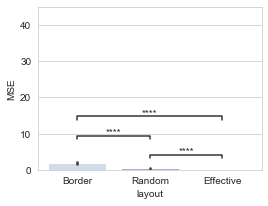

generated-data/quality-assessment-metrics/screening_scores_data-10-10-0.23--20221106-stdev-3-4.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:7.425e-07 t=4.990e+00
Border vs. Random: t-test independent samples, P_val:9.298e-39 t=1.375e+01
Border vs. Effective: t-test independent samples, P_val:1.810e-61 t=1.807e+01


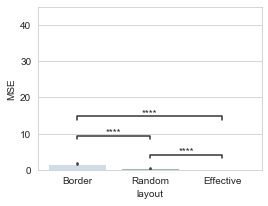

generated-data/quality-assessment-metrics/screening_scores_data-10-10-0.24--20221106-stdev-3-4.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:4.235e-07 t=5.101e+00
Border vs. Random: t-test independent samples, P_val:3.132e-25 t=1.074e+01
Border vs. Effective: t-test independent samples, P_val:5.740e-45 t=1.500e+01


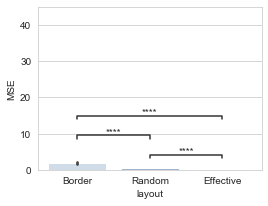

generated-data/quality-assessment-metrics/screening_scores_data-10-10-0.25--20221106-stdev-3-4.csv
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Random vs. Effective: t-test independent samples, P_val:1.660e-02 t=2.400e+00
Border vs. Random: t-test independent samples, P_val:1.179e-21 t=9.843e+00
Border vs. Effective: t-test independent samples, P_val:5.836e-58 t=1.744e+01


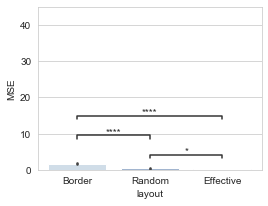

In [8]:
for error in range(0,26):
    screening_scores_data_filename = 'screening_scores_data-10-10-'+str(error/100)+'--20221106-stdev-3-4.csv'
    util.plotting_residual_metrics(data_directory+screening_scores_data_filename,metric='SSMD', fig_name=screening_scores_data_filename, y_max = 45, palette = sns.color_palette("BuPu",4), plots_directory = plots_directory)
    

## Examples of how to test other types of errors and plate effects

In [9]:
# Other options
#error_types = [{'type':"right-half", 'error_function':dt.add_errors_to_right_columns_half}]
#error_types = [{'type':"diagonal", 'error_function':dt.add_diagonal_errors}]
               #{'type':"left", 'error_function':dt.add_linear_errors_to_left_columns},
               #{'type':"right", 'error_function':dt.add_linear_errors_to_right_columns},
               #{'type':"top", 'error_function':dt.add_linear_errors_to_upper_rows},
               #{'type':"bottom", 'error_function':dt.add_linear_errors_to_lower_rows},
               #{'type':"left-exp", 'error_function':dt.add_exponential_errors_to_left_columns},
               #{'type':"top-exp", 'error_function':dt.add_exponential_errors_to_upper_rows},
               #{'type':"upper-half", 'error_function':dt.add_linear_errors_to_upper_rows_half},
               #{'type':"lower-half", 'error_function':dt.add_linear_errors_to_lower_rows_half},
               #{'type':"right-half", 'error_function':dt.add_linear_errors_to_right_columns_half}]


## References

[1] Zhang, X.D., 2008. Novel analytic criteria and effective plate designs for quality control in genome-scale RNAi screens. _Journal of biomolecular screening_, 13(5), pp.363-377.